# Jupyter notebook для анализа данных

In [1]:
#установка библиотеки psycopg2
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 2.5 MB/s eta 0:00:0000:0100:010m


In [2]:
#Подключаем необходимые библиотеки
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

Подключенение к PostgreSQL

In [3]:

conn = psycopg2.connect(
    host=os.getenv("DB_HOST"),
    port=int(os.getenv("DB_PORT")),
    dbname=os.getenv("DB_NAME"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD")
)

Загружаем данные в DataFrame

In [4]:
query = """
SELECT
    timestamp::date AS date,
    city,
    temperature,
    humidity,
    pressure,
    wind_speed
FROM weather
ORDER BY date;
"""

df = pd.read_sql(query, conn)
#Выводим первые 5 строк на проверку
df.head(5)

/tmp/ipykernel_111/3101457401.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,date,city,temperature,humidity,pressure,wind_speed
0,2026-01-01,Владивосток,-10.0,65.9,1016.2,16.7
1,2026-01-02,Москва,-8.0,34.6,986.1,0.3
2,2026-01-03,Санкт-Петербург,-12.0,51.7,1016.8,8.9
3,2026-01-04,Владивосток,-14.0,77.2,1019.6,7.4
4,2026-01-05,Владивосток,0.0,63.5,1019.3,12.4


Рассчитаем среднее значение темпаратуры по городам

In [5]:
avg_temp_city = (df.groupby("city")["temperature"].mean().sort_values())
avg_temp_city

city
Хабаровск         -16.307692
Санкт-Петербург   -10.928571
Москва             -6.588235
Владивосток        -5.882353
Name: temperature, dtype: float64

И выведем график:

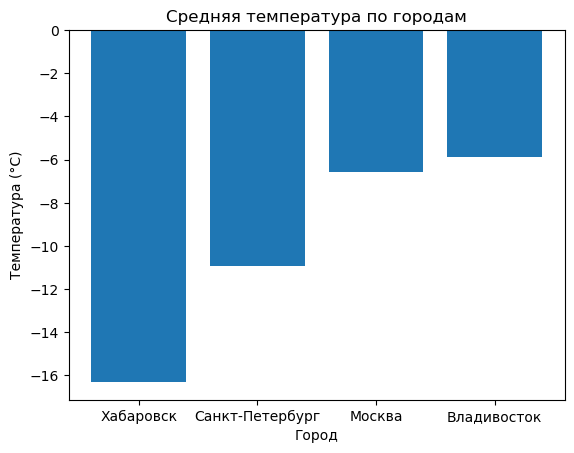

In [6]:
plt.bar(
    avg_temp_city.index,
    avg_temp_city.values
)

plt.title("Средняя температура по городам")
plt.xlabel("Город")
plt.ylabel("Температура (°C)")
plt.show()

Максимальная и минимальная влажность во Владивостоке

In [7]:
vladi_df = df[df["city"] == "Владивосток"]

vladi_humidity_stats = vladi_df["humidity"].agg(["min", "max"])
vladi_humidity_stats

min    45.2
max    90.3
Name: humidity, dtype: float64

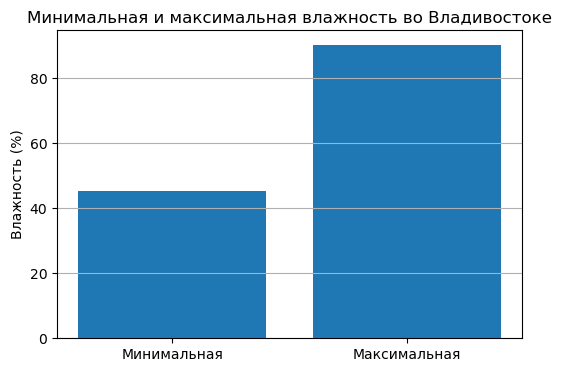

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(
    ["Минимальная", "Максимальная"],
    vladi_humidity_stats.values
)

plt.title("Минимальная и максимальная влажность во Владивостоке")
plt.ylabel("Влажность (%)")
plt.grid(axis="y")

plt.show()


Средняя влажность по городам

In [11]:
avg_humidity_by_city = df.groupby("city")["humidity"].mean()
avg_humidity_by_city

city
Владивосток        70.635294
Москва             57.494118
Санкт-Петербург    73.228571
Хабаровск          56.561538
Name: humidity, dtype: float64

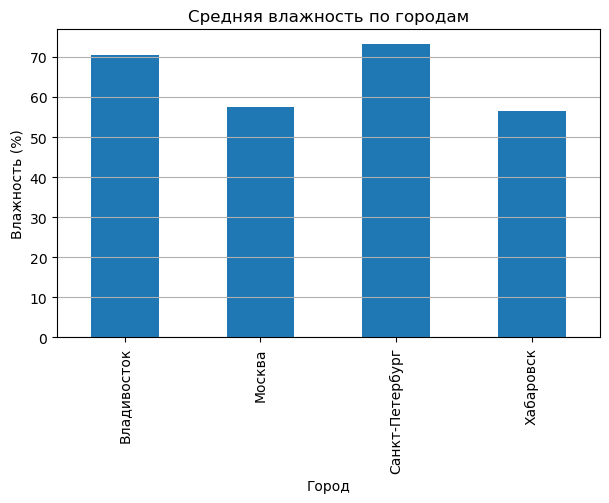

In [12]:
plt.figure(figsize=(7, 4))
avg_humidity_by_city.plot(kind="bar")
plt.title("Средняя влажность по городам")
plt.ylabel("Влажность (%)")
plt.xlabel("Город")
plt.grid(axis="y")
plt.show()

Средняя скорость ветра по городам

In [14]:
avg_wind_by_city = df.groupby("city")["wind_speed"].mean()
avg_wind_by_city

city
Владивосток        13.776471
Москва              5.076471
Санкт-Петербург     7.142857
Хабаровск           9.792308
Name: wind_speed, dtype: float64

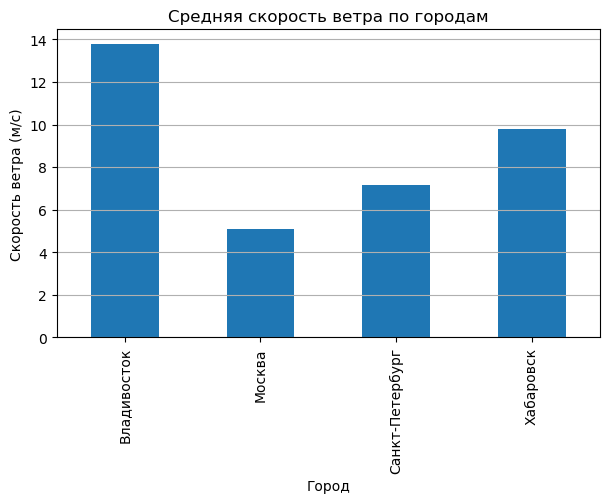

In [15]:
plt.figure(figsize=(7, 4))
avg_wind_by_city.plot(kind="bar")
plt.title("Средняя скорость ветра по городам")
plt.ylabel("Скорость ветра (м/с)")
plt.xlabel("Город")
plt.grid(axis="y")
plt.show()

Boxplot температуры по городам

<Figure size 800x400 with 0 Axes>

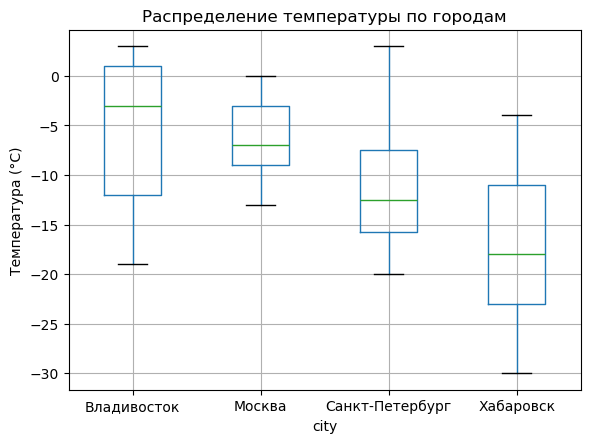

In [16]:
plt.figure(figsize=(8, 4))
df.boxplot(column="temperature", by="city")
plt.title("Распределение температуры по городам")
plt.suptitle("")
plt.ylabel("Температура (°C)")
plt.show()


Минимум, максимум и средняя температура по городам

In [17]:
stats_by_city = df.groupby("city")["temperature"].agg(
    min_temp="min",
    max_temp="max",
    avg_temp="mean"
)

stats_by_city

,min_temp,max_temp,avg_temp
city,,,
Владивосток,-19.0,3.0,-5.882353
Москва,-13.0,0.0,-6.588235
Санкт-Петербург,-20.0,3.0,-10.928571
Хабаровск,-30.0,-4.0,-16.307692


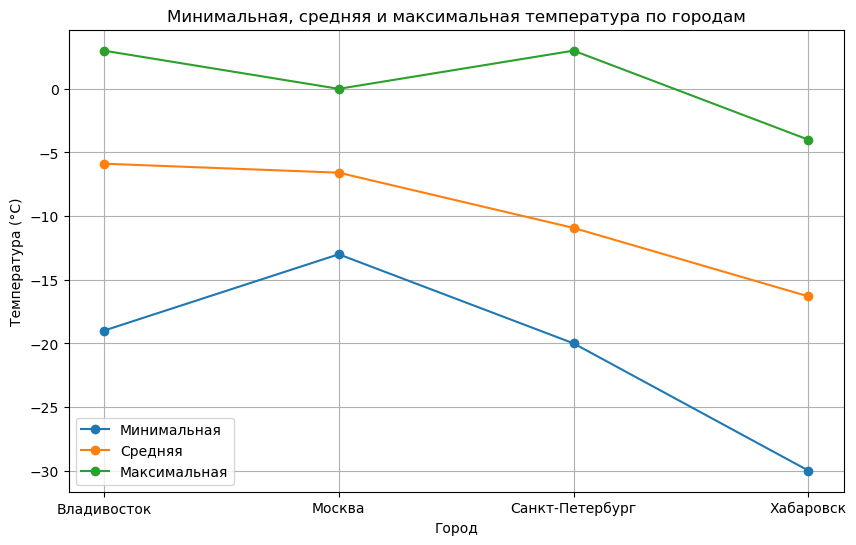

In [18]:
plt.figure(figsize=(10, 6))

plt.plot(stats_by_city.index, stats_by_city["min_temp"], marker="o", label="Минимальная")
plt.plot(stats_by_city.index, stats_by_city["avg_temp"], marker="o", label="Средняя")
plt.plot(stats_by_city.index, stats_by_city["max_temp"], marker="o", label="Максимальная")

plt.title("Минимальная, средняя и максимальная температура по городам")
plt.xlabel("Город")
plt.ylabel("Температура (°C)")
plt.legend()
plt.grid(True)

plt.show()